In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from datetime import datetime

In [2]:
os.chdir('../Data')

In [3]:
data_dictionary=pd.read_csv('./data_dictionary.csv')
data_dictionary

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


In [4]:
df=pd.read_csv('./train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
import missingno

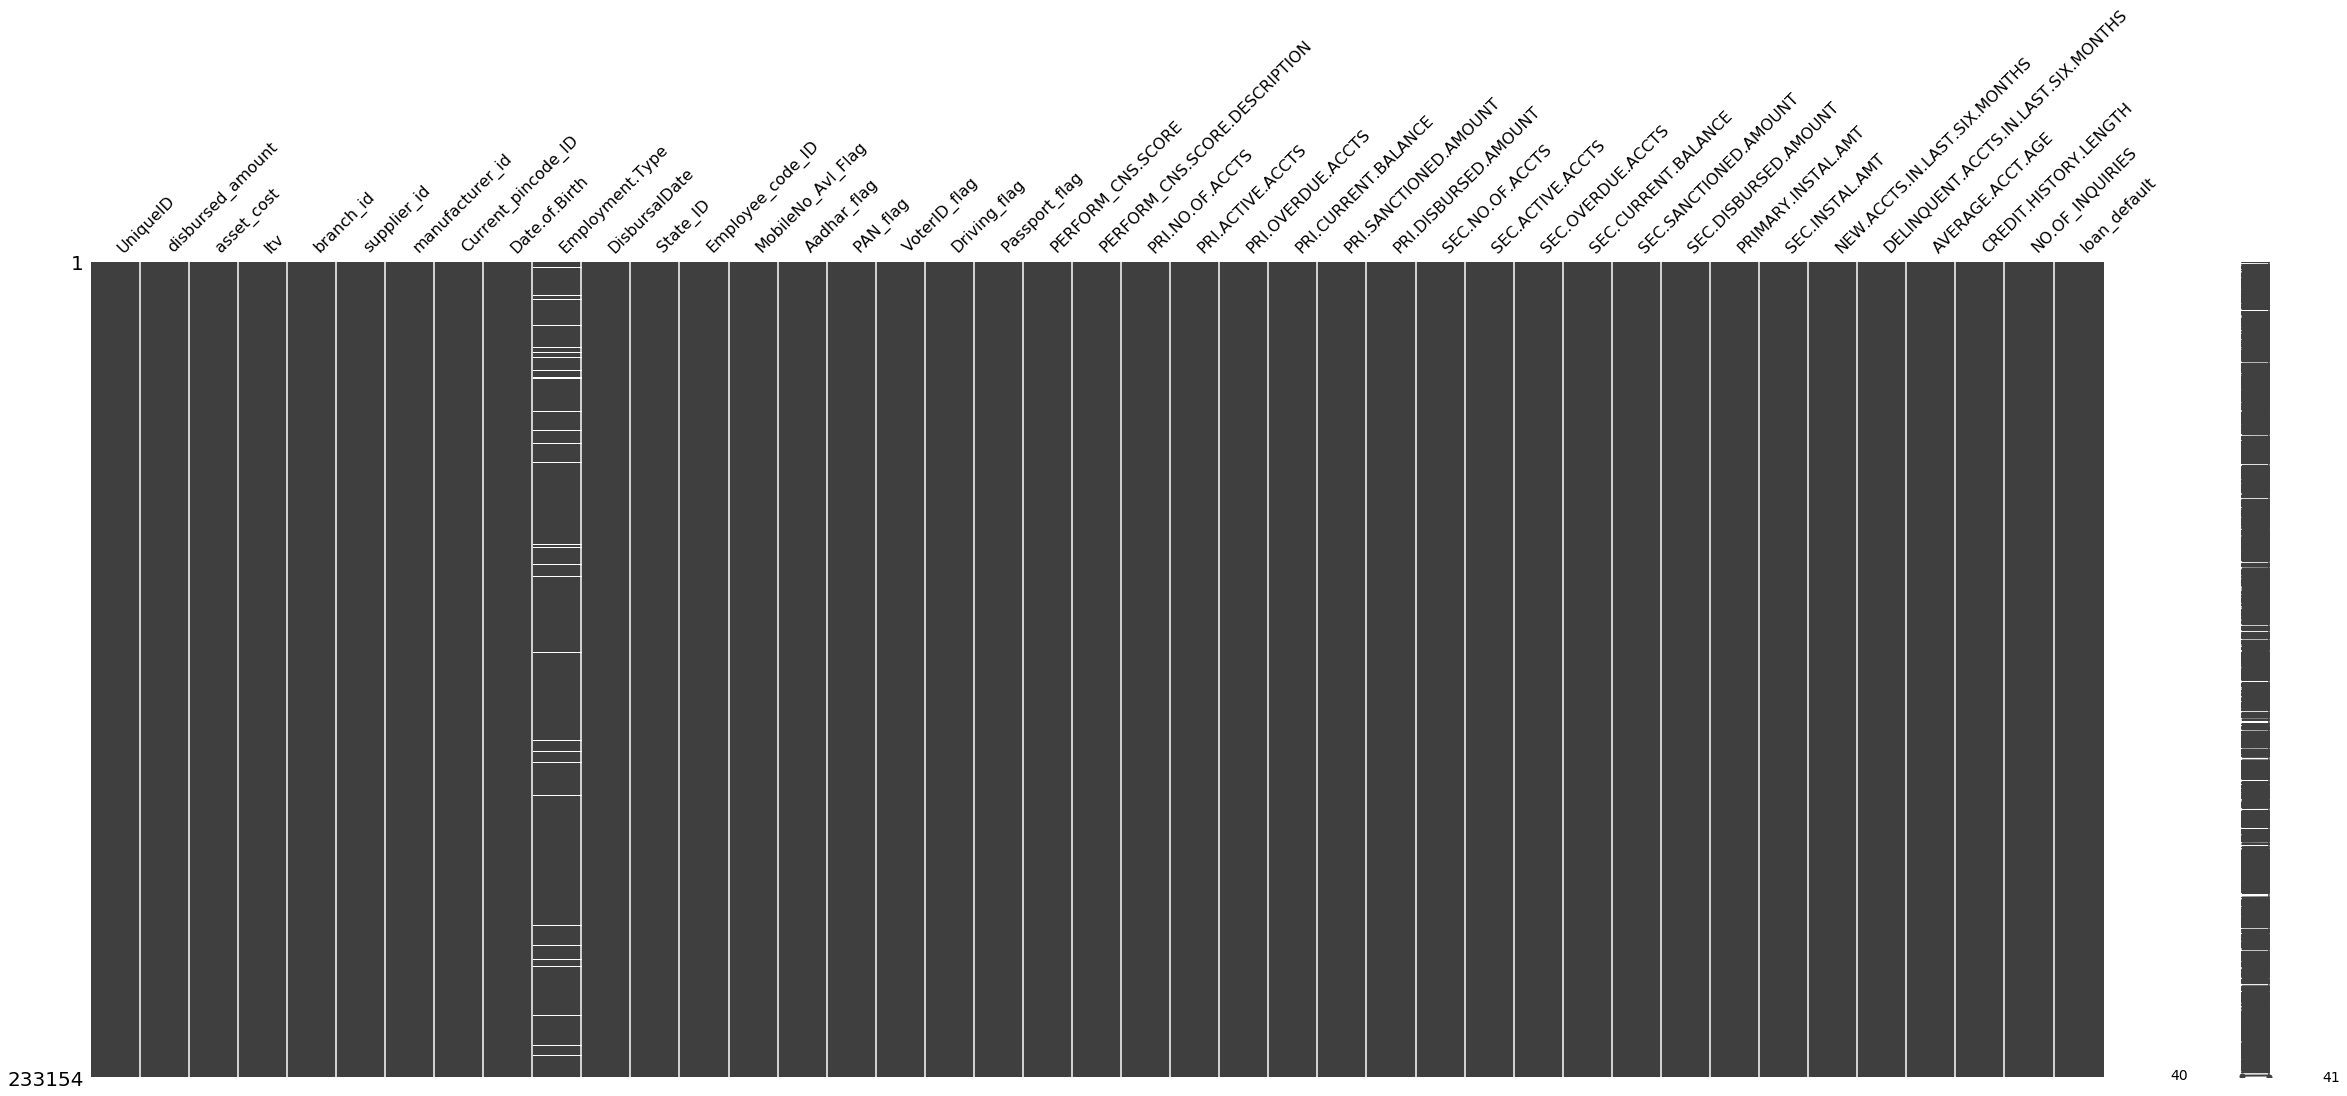

In [6]:
missingno.matrix(df,figsize=(40,15))

In [7]:
df.shape

(233154, 41)

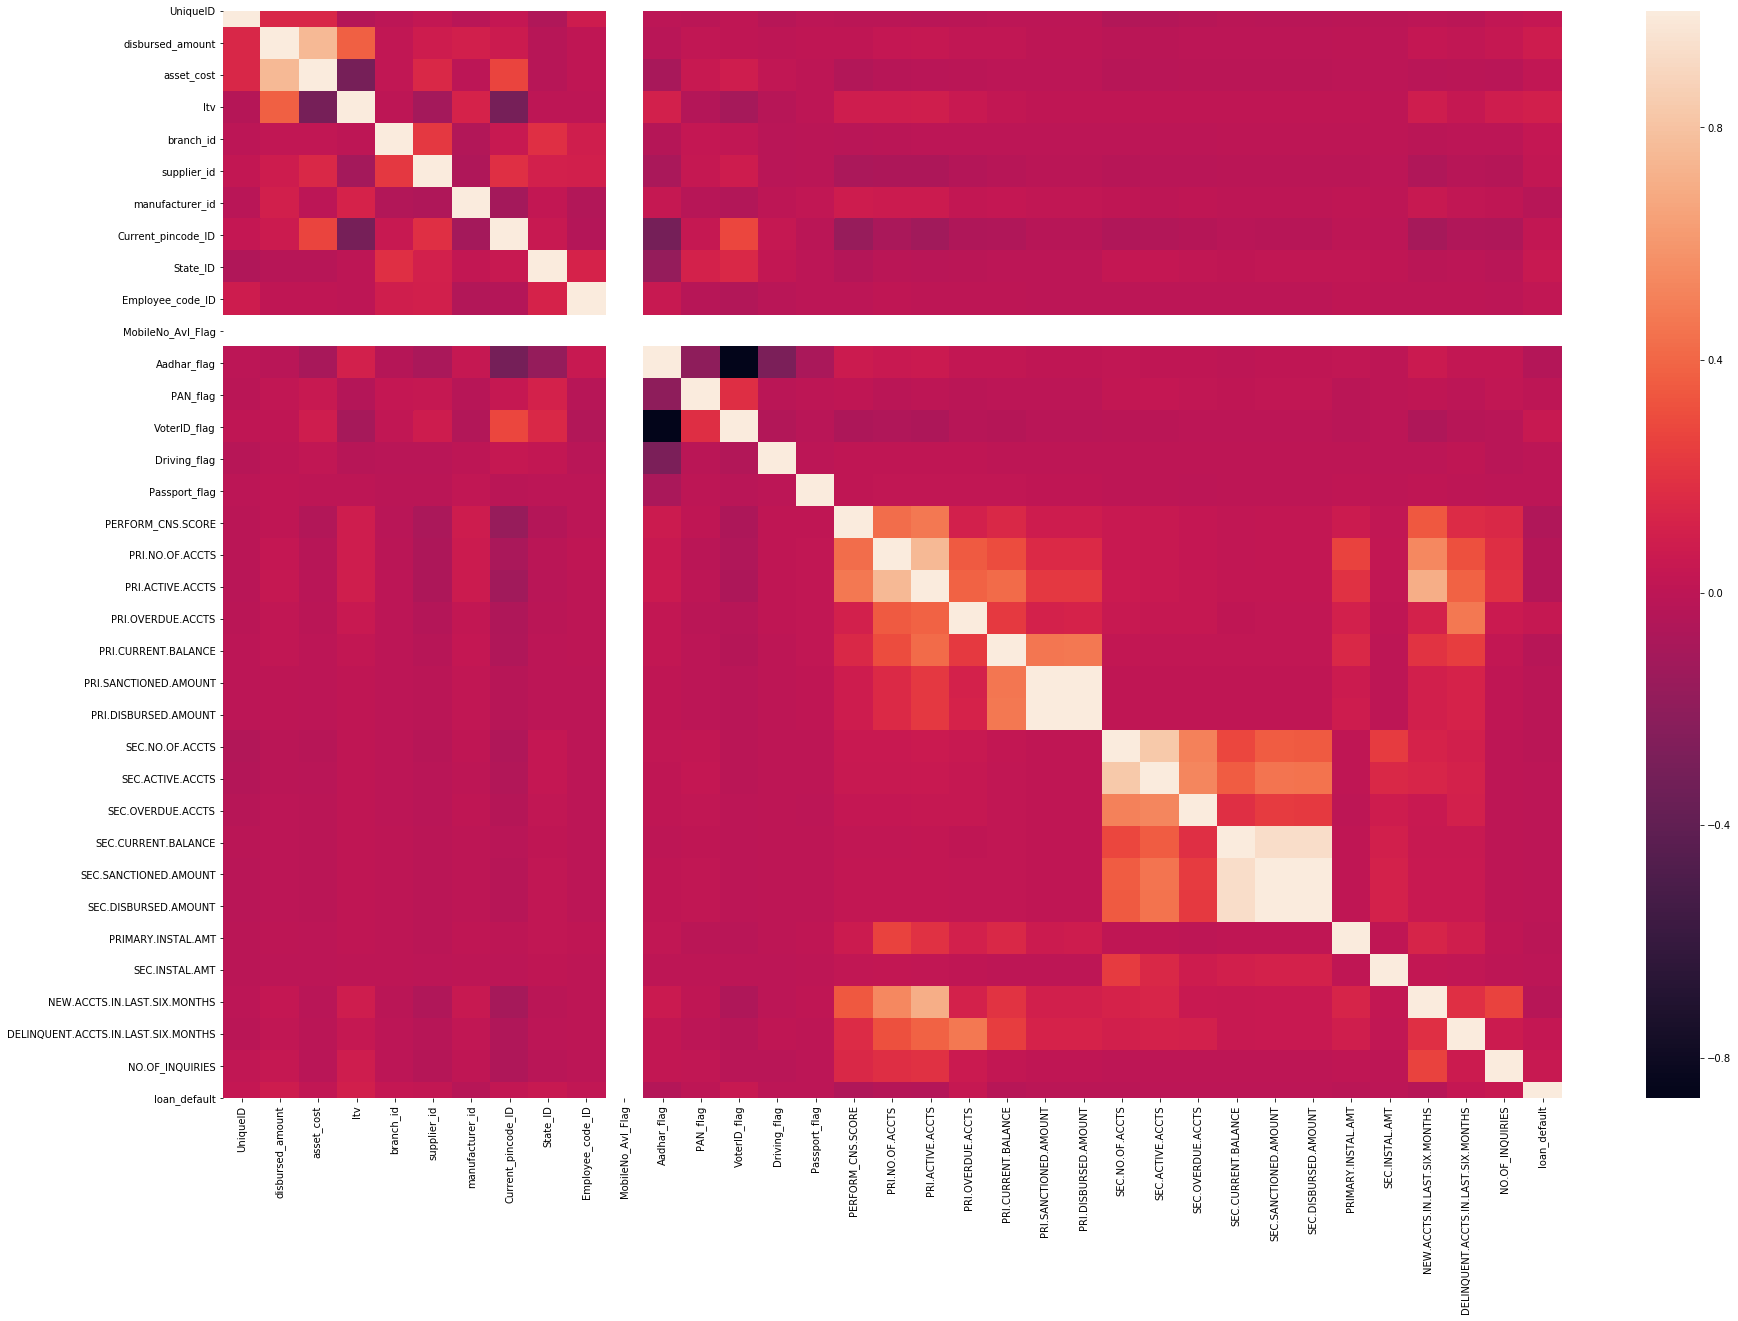

In [8]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr())
plt.show()

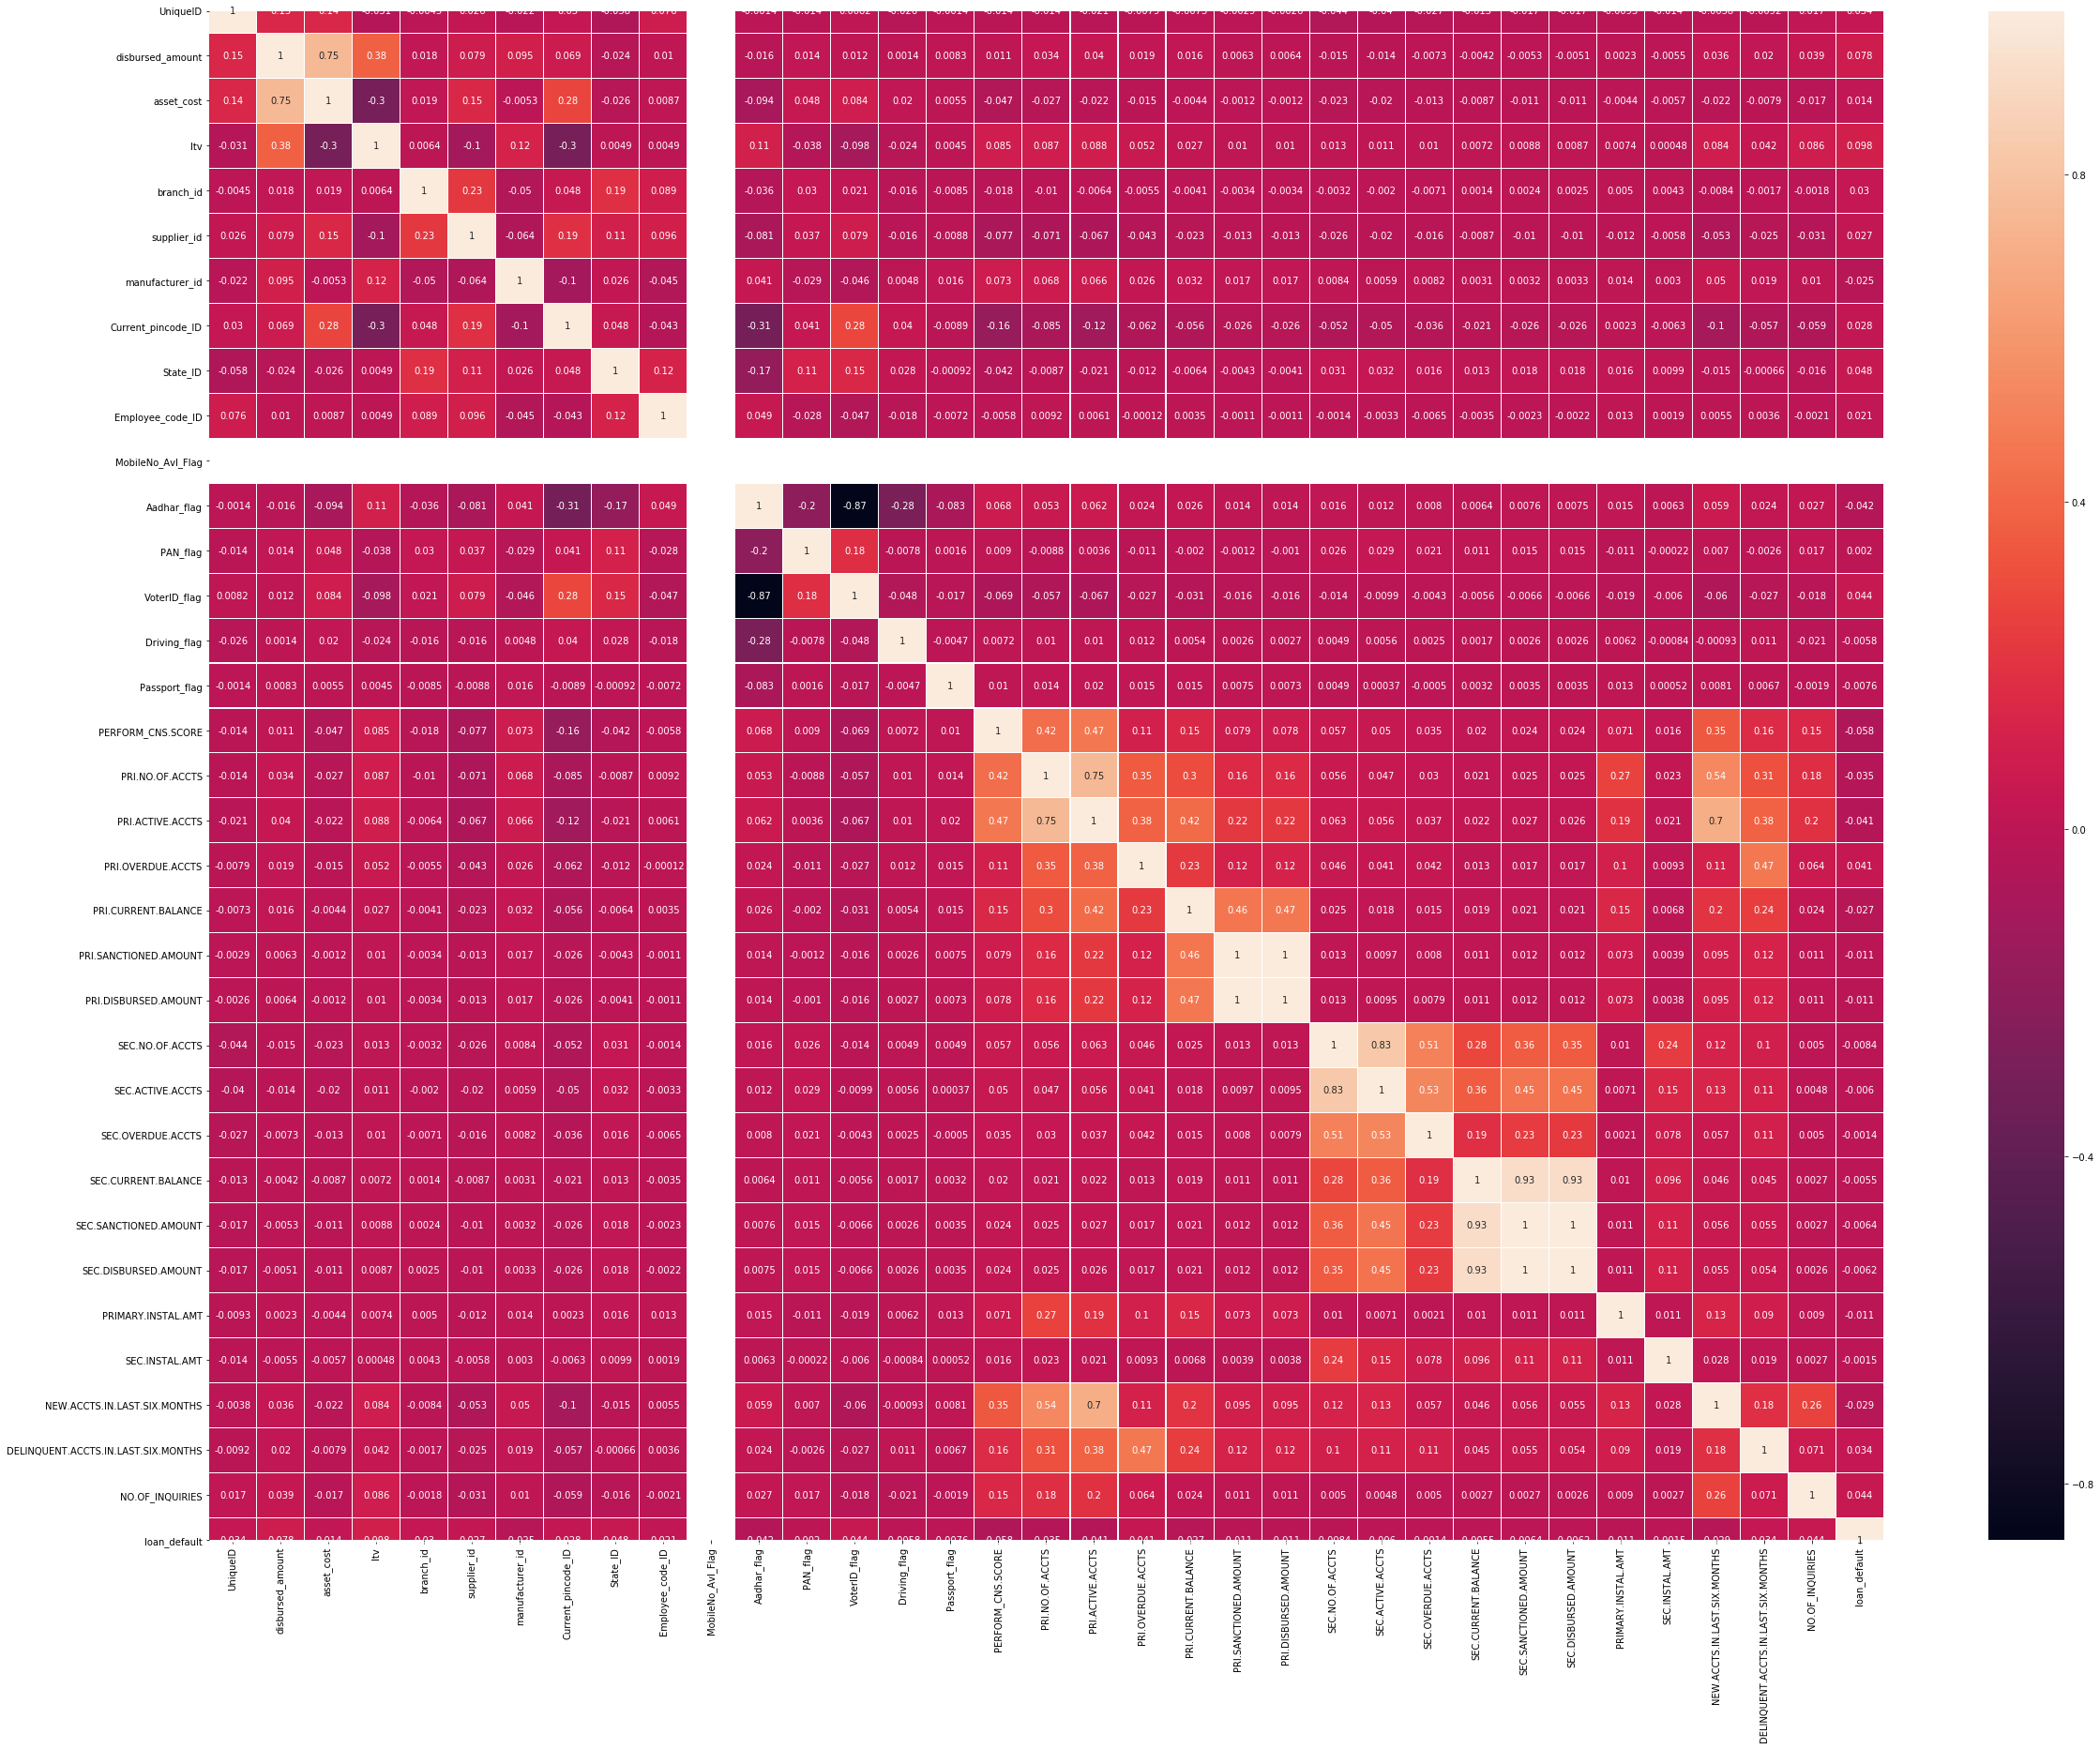

In [9]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),linewidths=0.05,annot=True)
plt.show()

In [77]:
df['disbursed_amount'].corr(df['ltv'])

0.4898539802979934

In [75]:
np.corrcoef(df['disbursed_amount'],df['ltv'])

array([[1.        , 0.48985398],
       [0.48985398, 1.        ]])

In [10]:
df.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,...,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,0.016537,0.033848
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,...,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,...,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,...,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,...,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,...,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357
manufacturer_id,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,...,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.010012,-0.025039
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,...,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,...,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.016129,0.048075
Employee_code_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,...,-0.006537,-0.003543,-0.002259,-0.002224,0.013470,0.001894,0.005473,0.003624,-0.002108,0.020657


In [11]:
df.drop(['MobileNo_Avl_Flag','UniqueID'],axis=1,inplace=True)

### disbursed_amount

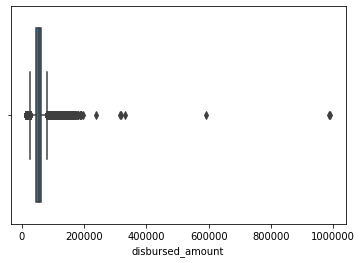

In [12]:
sns.boxplot(df['disbursed_amount'])

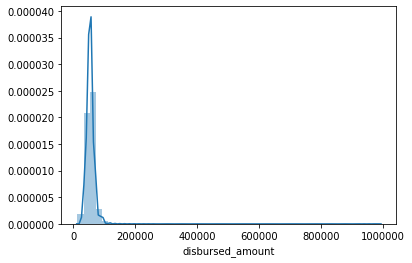

In [13]:
sns.distplot(df['disbursed_amount'])

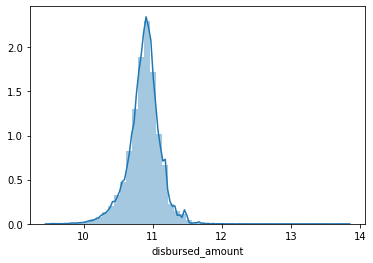

In [14]:
sns.distplot(df['disbursed_amount'].apply(lambda x:np.log(x)))

In [15]:
df['disbursed_amount']=df['disbursed_amount'].apply(lambda x:np.log(x))

In [16]:
#ie=df[df['disbursed_amount']>190_000].index
#print(ie)

In [17]:
# df.loc[ie,'disbursed_amount']=np.nan

In [18]:
'''from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)'''

'from sklearn.impute import KNNImputer\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nimp = IterativeImputer(max_iter=10, random_state=0)'

In [19]:
# pd.DataFrame(imp.fit_transform(df))

### asset_cost

In [20]:
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,10.831272,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,10.760983,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,10.883279,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,10.959766,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,10.866242,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,11.054265,105405,60.72,34,20700,48,1050,01-08-88,Salaried,26-10-18,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,11.207093,100600,74.95,34,23775,51,990,05-12-88,Self employed,23-10-18,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,10.418823,71212,48.45,77,22186,86,2299,01-06-76,Salaried,24-10-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,10.441705,73286,49.10,77,22186,86,2299,26-03-94,Salaried,29-09-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


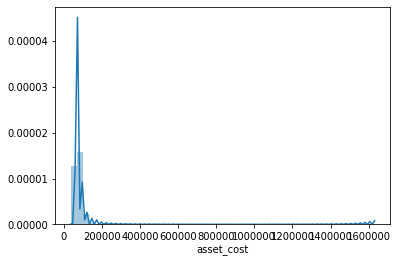

In [21]:
sns.distplot(df['asset_cost'])

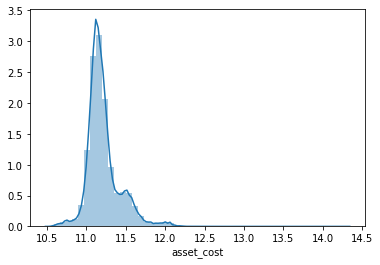

In [22]:
sns.distplot(df['asset_cost'].apply(lambda x:np.log(x)))

In [23]:
df['asset_cost']=df['asset_cost'].apply(lambda x:np.log(x))

### itv

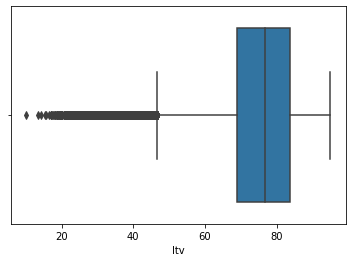

In [24]:
 sns.boxplot(df['ltv'])

### supplier_id

In [25]:
df['supplier_id'].value_counts()

18317    1432
15694    1300
15663    1275
17980    1268
14234    1258
         ... 
22811       1
23189       1
23712       1
15045       1
18019       1
Name: supplier_id, Length: 2953, dtype: int64

In [26]:
supplier_loan=pd.crosstab(df['supplier_id'],df['loan_default'])

In [27]:
import  scipy.stats                     as  stats

In [28]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(supplier_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)
p_value

Chi Square Statistics 9339.709281561767
p-value 0.0
Degree of freedom 2952


0.0

### branch_id

In [29]:
df['branch_id'].value_counts()

2      13138
67     11328
3       9230
5       9218
36      8832
       ...  
217      183
261      176
84       156
111       89
158       69
Name: branch_id, Length: 82, dtype: int64

In [30]:
pd.crosstab(df['branch_id'],df['loan_default'])

loan_default,0,1
branch_id,,
1,4856,853
2,10683,2455
3,7616,1614
5,7171,2047
7,2566,656
...,...,...
257,1007,249
258,297,77
259,267,79


In [31]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(supplier_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

Chi Square Statistics 9339.709281561767
p-value 0.0
Degree of freedom 2952


### manufacture_id

In [32]:
df['manufacturer_id'].value_counts()

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: manufacturer_id, dtype: int64

In [33]:
manu_loan=pd.crosstab(df['manufacturer_id'],df['loan_default'])
print(manu_loan)

loan_default         0      1
manufacturer_id              
45               43687  12939
48               12156   4554
49                7984   2236
51               21547   5657
67                1882    523
86               87124  22410
120               7526   2132
145                622    156
152                  6      0
153                  8      4
156                  1      0


In [34]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(manu_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

Chi Square Statistics 464.69764016358414
p-value 1.5277380091688753e-93
Degree of freedom 10


### age of disbursal
Changed to **Age**

In [35]:
def age(dur):
    yr = int(dur.split('-')[2])
    if yr >=0 and yr<=19:
        return yr+2000
    else:
         return yr+1900

df['Date.of.Birth'] = df['Date.of.Birth'].apply(age)
df['DisbursalDate'] = df['DisbursalDate'].apply(age)

In [36]:
df['age_at_disbursal']=df['DisbursalDate']-df['Date.of.Birth']

In [37]:
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age_at_disbursal
0,10.831272,10.975071,89.55,67,22807,45,1441,1984,Salaried,2018,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
1,10.760983,11.090568,73.23,67,22807,45,1502,1985,Self employed,2018,...,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,33
2,10.883279,11.024513,89.63,67,22807,45,1497,1985,Self employed,2018,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,33
3,10.959766,11.099121,88.48,67,22807,45,1501,1993,Self employed,2018,...,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,25
4,10.866242,11.007087,88.39,67,22807,45,1495,1977,Self employed,2018,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,41


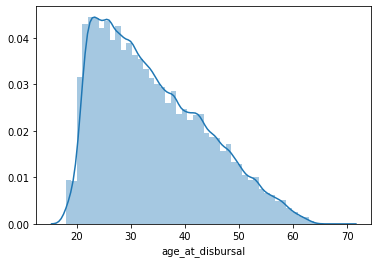

In [38]:
sns.distplot(df['age_at_disbursal'])

In [39]:
df=df.drop(['Date.of.Birth','DisbursalDate'],axis=1)

### Employment Type

In [46]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
unknown            7661
Name: Employment.Type, dtype: int64

In [41]:
df['Employment.Type']=df['Employment.Type'].fillna('unknown')

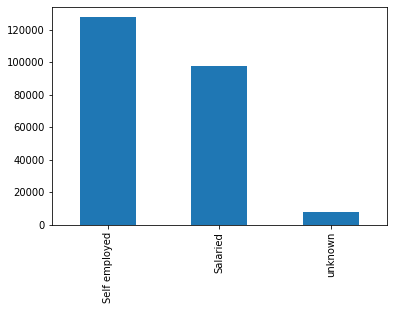

In [42]:
df['Employment.Type'].value_counts().plot(kind='bar')

In [47]:
df['Employment.Type'].value_counts(normalize=True)

Self employed    0.547428
Salaried         0.419714
unknown          0.032858
Name: Employment.Type, dtype: float64

In [60]:
from sklearn.preprocessing import OneHotEncoder
ohc=OneHotEncoder(sparse=False)

In [61]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#df['Employment.Type']=le.fit_transform(df['Employment.Type'])

In [63]:
ohc.fit_transform(df[['Employment.Type']]).astype(int)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [72]:
ohc.categories_

[array(['Salaried', 'Self employed', 'unknown'], dtype=object)]

In [67]:
temp=pd.DataFrame(ohc.fit_transform(df[['Employment.Type']]).astype(int),columns=ohc.categories_)
print(temp.head())

  Salaried Self employed unknown
0        1             0       0
1        0             1       0
2        0             1       0
3        0             1       0
4        0             1       0


In [ ]:
emp_loan=pd.crosstab(df['Employment.Type'],df['loan_default'])
print(emp_loan)

In [ ]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(emp_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

In [68]:
df = pd.concat([df,temp],axis=1)
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,age_at_disbursal,"(Salaried,)","(Self employed,)","(unknown,)"
0,10.831272,10.975071,89.55,67,22807,45,1441,Salaried,6,1998,...,0,0,0yrs 0mon,0yrs 0mon,0,0,34,1,0,0
1,10.760983,11.090568,73.23,67,22807,45,1502,Self employed,6,1998,...,0,1,1yrs 11mon,1yrs 11mon,0,1,33,0,1,0
2,10.883279,11.024513,89.63,67,22807,45,1497,Self employed,6,1998,...,0,0,0yrs 0mon,0yrs 0mon,0,0,33,0,1,0
3,10.959766,11.099121,88.48,67,22807,45,1501,Self employed,6,1998,...,0,0,0yrs 8mon,1yrs 3mon,1,1,25,0,1,0
4,10.866242,11.007087,88.39,67,22807,45,1495,Self employed,6,1998,...,0,0,0yrs 0mon,0yrs 0mon,1,1,41,0,1,0


### StateId

In [ ]:
df['State_ID'].value_counts()

In [ ]:
state_loan=pd.crosstab(df['State_ID'],df['loan_default'])
print(state_loan)

In [ ]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(state_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

### State_ID: Passport_flag

In [ ]:
df.loc[:,'State_ID':'Passport_flag']

In [ ]:
temp=df.loc[:,'State_ID':'Passport_flag'].columns
print(temp)

In [ ]:
for i in temp:
    print('Feature:',i)
    chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(pd.crosstab(df[i],df['loan_default']))
    print('Chi Square Statistics',chi_sq)
    print('p-value',p_value)
    print('Degree of freedom',deg_freedom)
    print()

In [ ]:
df=df.drop(['PAN_flag'],axis=1)

### 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION'

In [ ]:
df[['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION']]

In [ ]:
sns.distplot(df['PERFORM_CNS.SCORE'])

In [ ]:
def cns_score(score):
    if score<100:
        return 0
    elif (score>=100) & (score<200):
        return 1
    elif (score>=200) & (score<300):
        return 2
    elif (score>=300) & (score<400):
        return 3
    elif (score>=400) & (score<500):
        return 4
    elif (score>=500) & (score<600):
        return 5
    elif (score>=600) & (score <700):
        return 6
    elif (score>=700) & (score <800):
        return 7
    elif (score>=800) & (score <900):
        return 8
    elif (score>=900) & (score <1000):
        return 9
    else:
        return 10

In [ ]:
cns_score(1004)

In [ ]:
df['PERFORM_CNS.SCORE'].map(lambda x:cns_score(x)).value_counts()

In [ ]:
df['PERFORM_CNS.SCORE']=df['PERFORM_CNS.SCORE'].map(lambda x:cns_score(x))

In [ ]:
df[ 'PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['PERFORM_CNS.SCORE.DESCRIPTION']=le.fit_transform(df['PERFORM_CNS.SCORE.DESCRIPTION'])

In [ ]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

In [ ]:
for i in ['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION']:
    print('Feature:',i)
    chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(pd.crosstab(df[i],df['loan_default']))
    print('Chi Square Statistics',chi_sq)
    print('p-value',p_value)
    print('Degree of freedom',deg_freedom)
    print()

### 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT'

In [48]:
df.loc[:,[ 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT']]

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT
0,0,0,0,0,0,0
1,1,1,1,27600,50200,50200
2,0,0,0,0,0,0
3,3,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
233149,4,3,0,390443,416133,416133
233150,1,0,0,0,0,0
233151,0,0,0,0,0,0
233152,0,0,0,0,0,0


In [49]:
primary=df.loc[:,[ 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT']]

In [50]:
primary.describe()

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT
count,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05
mean,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05
std,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06
min,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04
max,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09


In [51]:
primary['PRI.NO.OF.ACCTS'].value_counts()

0      116950
1       34978
2       19784
3       13015
4        9323
        ...  
83          1
147         1
120         1
194         1
124         1
Name: PRI.NO.OF.ACCTS, Length: 108, dtype: int64

In [52]:
pri_col=['PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT']

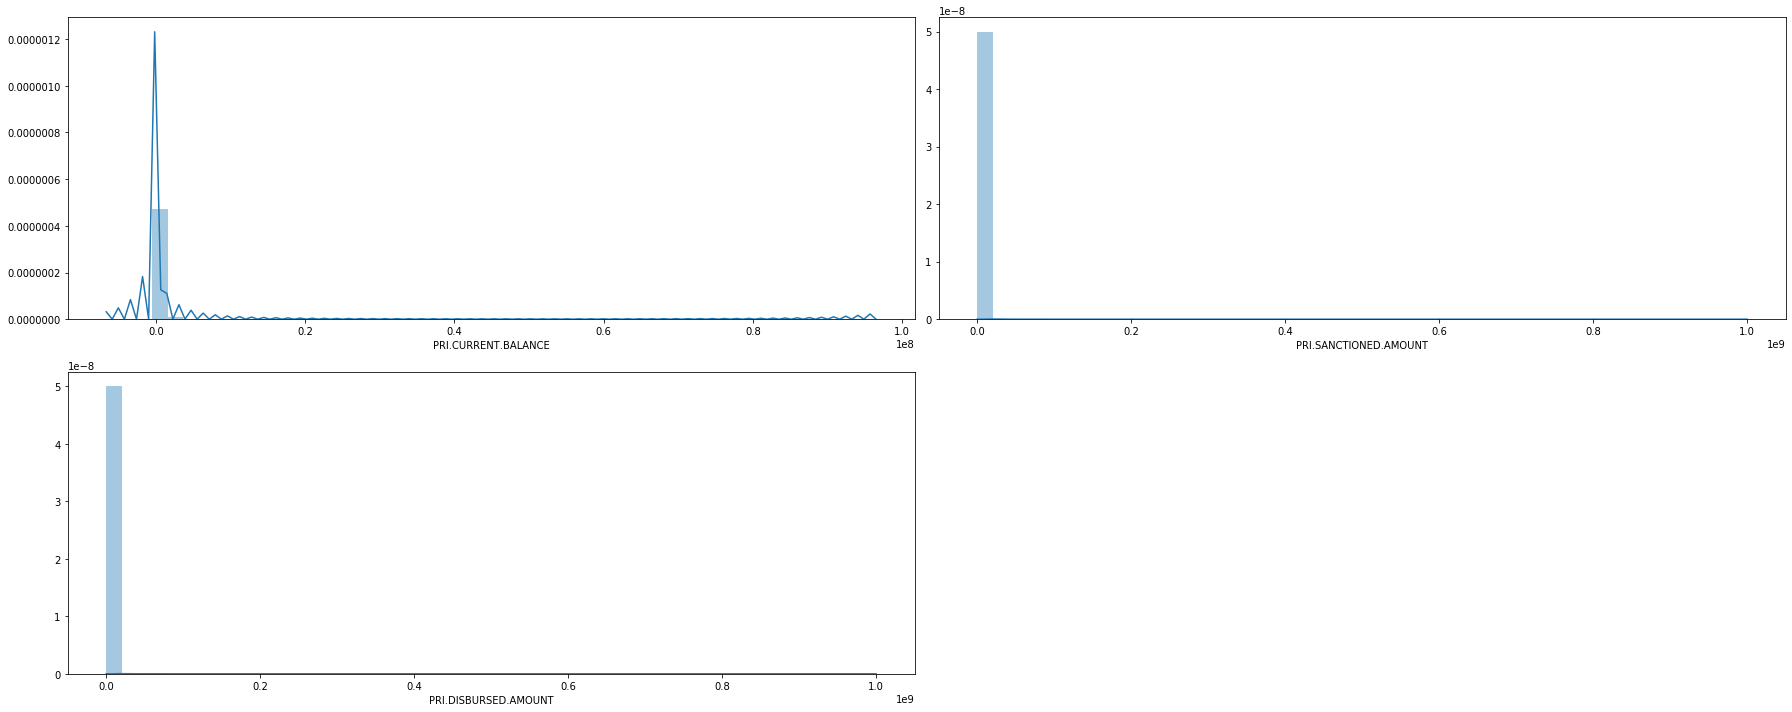

In [53]:
count=1
plt.figure(figsize=(25,10))
for i in pri_col:
    plt.subplot(2,2,count)
    sns.distplot(df[i])
    count+=1
plt.tight_layout()

In [54]:
df['PRI.CURRENT.BALANCE'].isnull().sum()

0

ValueError: cannot convert float NaN to integer

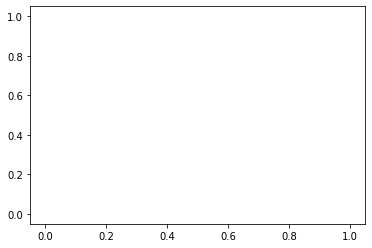

In [57]:
sns.distplot(df['PRI.CURRENT.BALANCE'].apply(lambda x:np.log(x)+1))

### 'SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT'

In [ ]:
df[['SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']]

In [ ]:
secondary=df[['SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']]

In [ ]:
secondary['SEC.NO.OF.ACCTS'].value_counts()

In [ ]:
secondary.describe()

### PRIMARY.INSTAL.AMT

In [ ]:
df.columns

In [ ]:
df['PRIMARY.INSTAL.AMT']

In [ ]:
sns.boxplot(df['PRIMARY.INSTAL.AMT'])

### SEC.INSTAL.AMT

In [ ]:
df['SEC.INSTAL.AMT']

In [ ]:
df['SEC.INSTAL.AMT'].value_counts()

### NEW.ACCTS.IN.LAST.SIX.MONTHS

In [ ]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS']

In [ ]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

### DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS

In [ ]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS']

### DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS

In [ ]:
df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

In [ ]:
df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

### AVERAGE.ACCT.AGE

In [ ]:
df['AVERAGE.ACCT.AGE'].index

### CREDIT.HISTORY.LENGTH

In [ ]:
df['CREDIT.HISTORY.LENGTH'].index

In [ ]:
df.columns

### NO.OF_INQUIRIES

In [ ]:
df['NO.OF_INQUIRIES'].value_counts()

In [ ]:
df['NO.OF_INQUIRIES'].describe()

### loan_default (Target/Dependent Variable)

In [ ]:
print(df['loan_default'].value_counts())
sns.countplot(df['loan_default'])

## Base Model

In [ ]:
y=df['loan_default']
X=df.drop(['loan_default'],axis=1)

In [ ]:
kfrom sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(X,y,t)